Using TensorFlow backend.


Epoch 1/100
200/200 [==============================] - 0s 341us/step - loss: 0.3099
Epoch 2/100
200/200 [==============================] - 0s 73us/step - loss: 0.2376
Epoch 3/100
200/200 [==============================] - 0s 79us/step - loss: 0.1972
Epoch 4/100
200/200 [==============================] - 0s 69us/step - loss: 0.1719
Epoch 5/100
200/200 [==============================] - 0s 51us/step - loss: 0.1547
Epoch 6/100
200/200 [==============================] - 0s 78us/step - loss: 0.1401
Epoch 7/100
200/200 [==============================] - 0s 61us/step - loss: 0.1314
Epoch 8/100
200/200 [==============================] - 0s 75us/step - loss: 0.1247
Epoch 9/100
200/200 [==============================] - 0s 65us/step - loss: 0.1196
Epoch 10/100
200/200 [==============================] - 0s 70us/step - loss: 0.1157
Epoch 11/100
200/200 [==============================] - 0s 77us/step - loss: 0.1124
Epoch 12/100
200/200 [==============================] - 0s 75us/step - loss: 0.1103


200/200 [==============================] - 0s 34us/step - loss: 0.0915
Epoch 99/100
200/200 [==============================] - 0s 28us/step - loss: 0.0915
Epoch 100/100
200/200 [==============================] - 0s 48us/step - loss: 0.0915


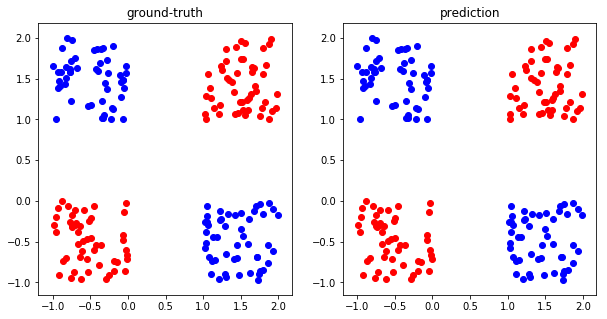

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
import tensorflow as tf
import numpy as np
import numpy.random as rnd

# -----------------------------------------
# random XOR data generation
# -----------------------------------------
A = rnd.random((50, 2)); A += np.array([[1,1]])
B = rnd.random((50, 2)); B += np.array([[-1,-1]])
C = rnd.random((50, 2)); C += np.array([[-1,1]])
D = rnd.random((50, 2)); D += np.array([[1,-1]])
X = np.concatenate([A,B,C,D])
Y = np.squeeze([[1] * 100 + [-1] * 100])

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121); ax.set_title('ground-truth')
ax.scatter(X[(Y>0).nonzero()][:,0], X[(Y>0).nonzero()][:,1], c='red')
ax.scatter(X[(Y<0).nonzero()][:,0], X[(Y<0).nonzero()][:,1], c='blue')

# -----------------------------------------
# model creation
# -----------------------------------------

def gauss(x):
    return 2 * tf.exp(-0.5 * tf.square(x)) - 1

model = Sequential()
model.add(Dense(1, input_dim=2))
model.add(Activation(gauss))
model.compile(loss='mse', optimizer='sgd')

model.fit(X, Y, epochs=100)

Y_hat = np.squeeze(model.predict(X))

ax = fig.add_subplot(122); ax.set_title('prediction')
ax.scatter(X[(Y_hat>0).nonzero()][:,0], 
           X[(Y_hat>0).nonzero()][:,1], c='red')
ax.scatter(X[(Y_hat<0).nonzero()][:,0], 
           X[(Y_hat<0).nonzero()][:,1], c='blue')


plt.show()